<center>
  <div style="font-family: Arial, sans-serif; background-color: #67b588; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Credit Card Fraud Detection Project
  </div>
</center>

# Summary

### Chapter 1: Exploratory Data Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Values
- 1.3: Visual Analysis

### Chapter 2: Data Processing
- 2.1: Splitting Data
- 2.2: Standard Scaler
- 2.3: Undersampling
- 2.4: Oversampling
- 2.5: Variance Inflation Factor (VIF)

### Chapter 3: Building Machine Learning Models
- 3.1: Logistic Regression
- 3.2: Random Forest
- 3.3: Gradient Boosting Classifier
- 3.4: Support Vector Classifier
- 3.5: Sequential Neural Network
- 3.6: Analyzing Best Results

### Chapter 4: Testing Models And Conclusion

- 4.1: Testing Model
- 4.2: Feature Selection
- 4.3: Random Search

<center>
  <div style="font-family: Arial, sans-serif; background-color: #67b588; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 1: Exploratory Data Analysis
  </div>
</center>

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Importing Data and First Look

In [193]:
fraud_df = pd.read_csv('creditcard.csv')

fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [194]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [195]:
fraud_df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### 1.2: Checking Values

In [196]:
fraud_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [197]:
fraud_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### 1.3: Visual Analysis

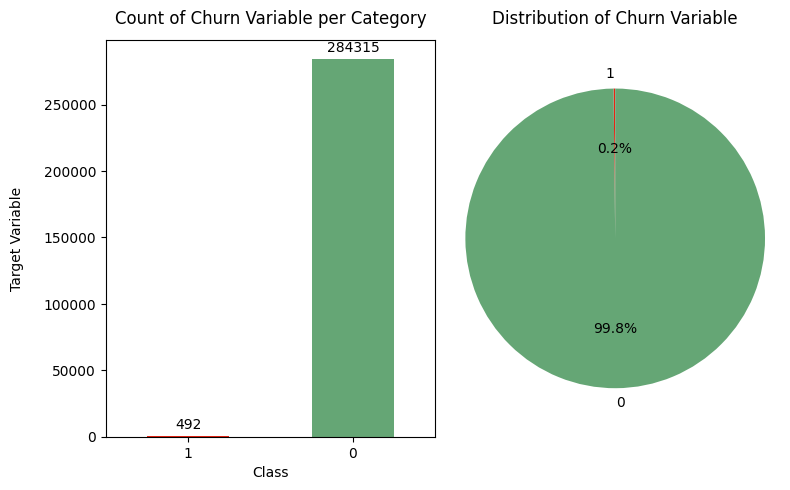

In [198]:
# Data and colors
ordered_counts = fraud_df['Class'].value_counts()[[1, 0]]
colors = ['#e72313', '#65a675', '#67b588']
# colors3 = ['#f26060', '#72a0e5', '#bb95ed']

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Bar chart
ax_bar = axes[0]
ordered_counts.plot(kind='bar', color=colors, ax=ax_bar)
for bar in ax_bar.patches:
    ax_bar.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + ordered_counts.max() * 0.02,
                str(int(bar.get_height())), ha='center', fontsize=10)
ax_bar.set_ylabel("Target Variable", labelpad=14)
ax_bar.set_title("Count of Churn Variable per Category", y=1.02)
ax_bar.set_xticklabels(ordered_counts.index, rotation=0)

# Pie chart
ax_pie = axes[1]
ax_pie.pie(ordered_counts, labels=ordered_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors)
ax_pie.set_title("Distribution of Churn Variable", y=1.02)
ax_pie.axis('equal')  # Keeps the circle shape

plt.tight_layout()
plt.show()

Our target variable is highly imbalanced.

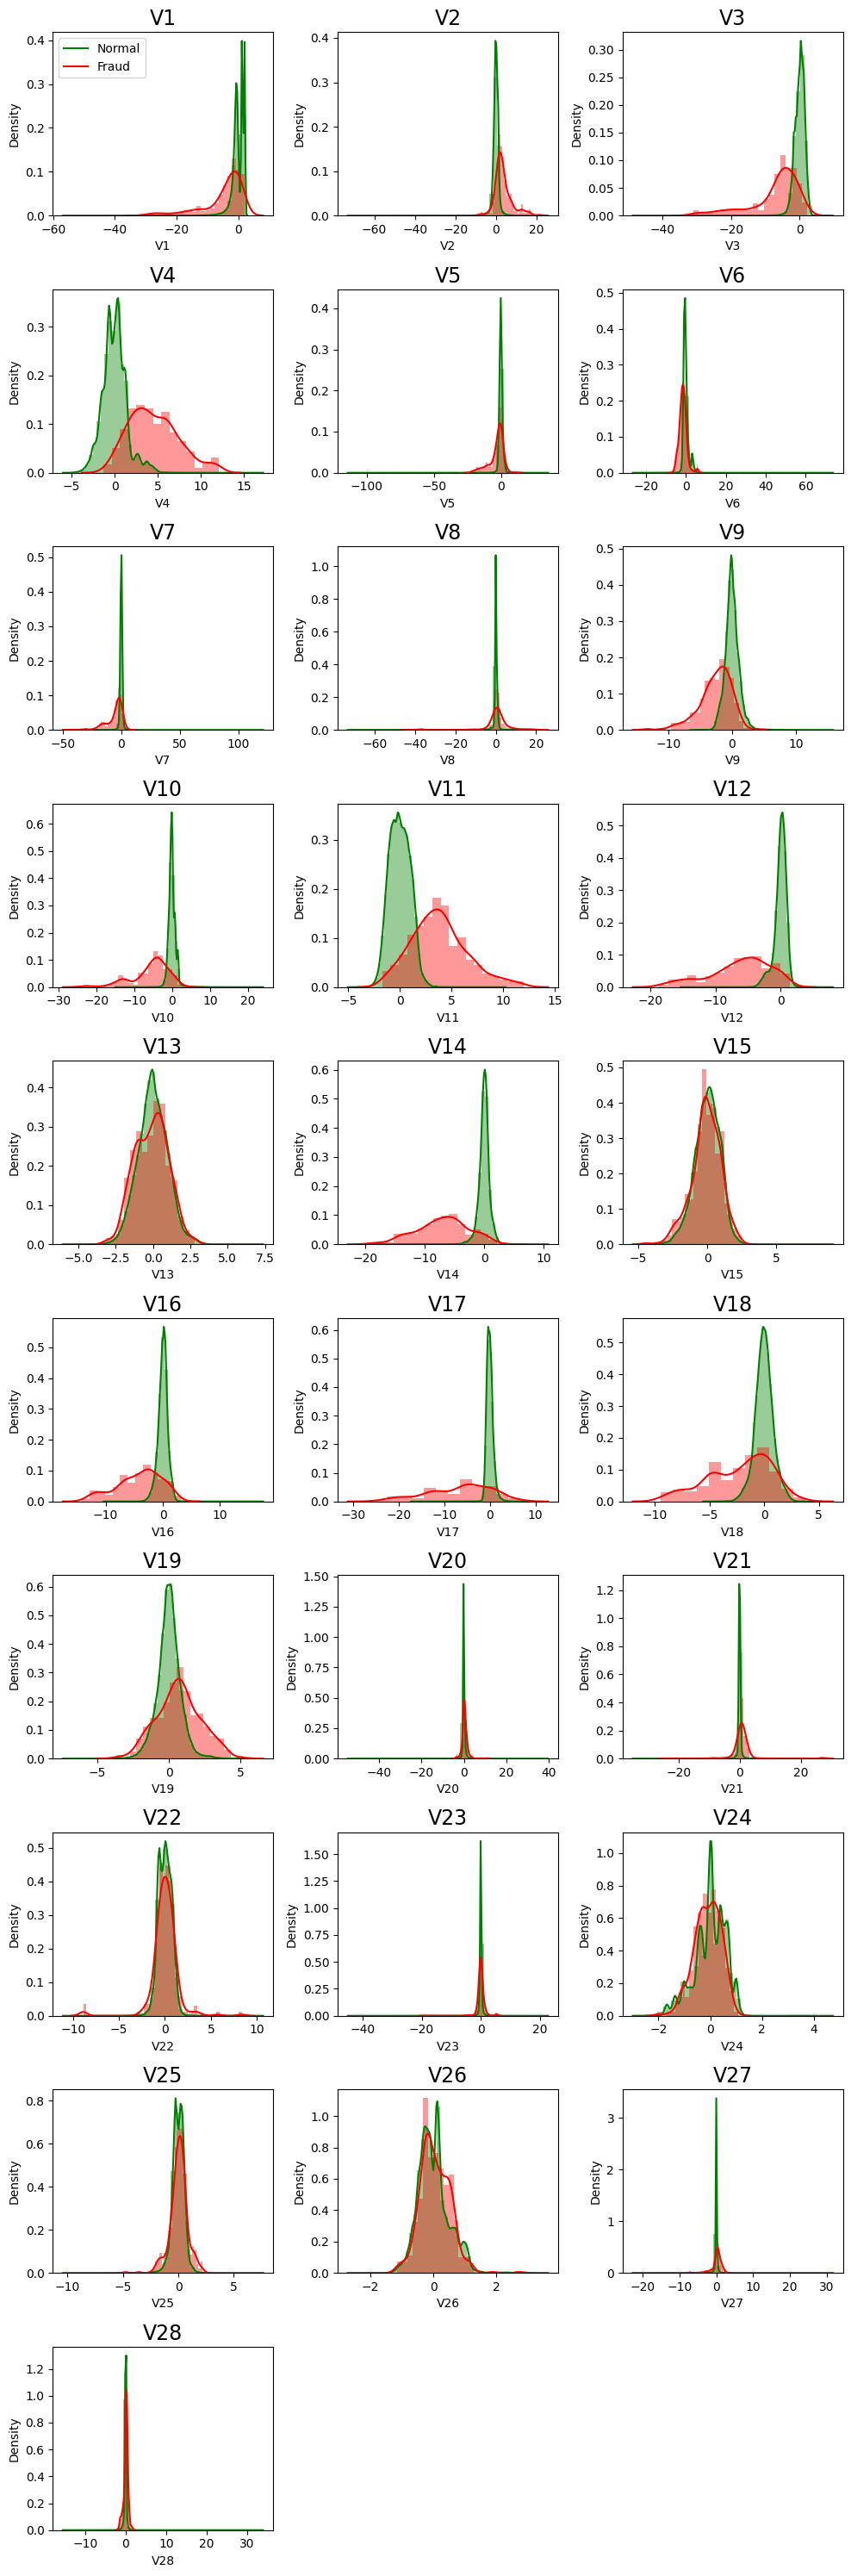

In [199]:
# Remove the columns 'Time', 'Amount', and 'Class' from the list of columns.
cols_to_exclude = ['Time', 'Amount', 'Class']
cols = [col for col in fraud_df.columns if col not in cols_to_exclude]

normal_records = fraud_df['Class'] == 0
fraud_records = fraud_df['Class'] == 1

num_cols = len(cols)  # Get the number of columns

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Round up the division
plt.figure(figsize=(10, 3 * num_rows))  # Adjust the figure size based on the number of rows

for n, col in enumerate(cols, start=1):  # Start enumerate from 1
    plt.subplot(num_rows, 3, n)
    sns.distplot(fraud_df[col][normal_records], color='green')  # Plot normal data
    sns.distplot(fraud_df[col][fraud_records], color='red')  # Plot fraud data
    plt.title(col, fontsize=17)
    if n == 1:  # Add legend only for the first subplot
        plt.legend(labels=['Normal', 'Fraud'])

plt.tight_layout()  # Adjust subplot parameters to give specified padding

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('distplot.png', bbox_inches='tight')

plt.show()

The variables show distinct patterns between fraud and non-fraud transactions. This indicates that these variables may be useful for predicting fraud in predictive models.

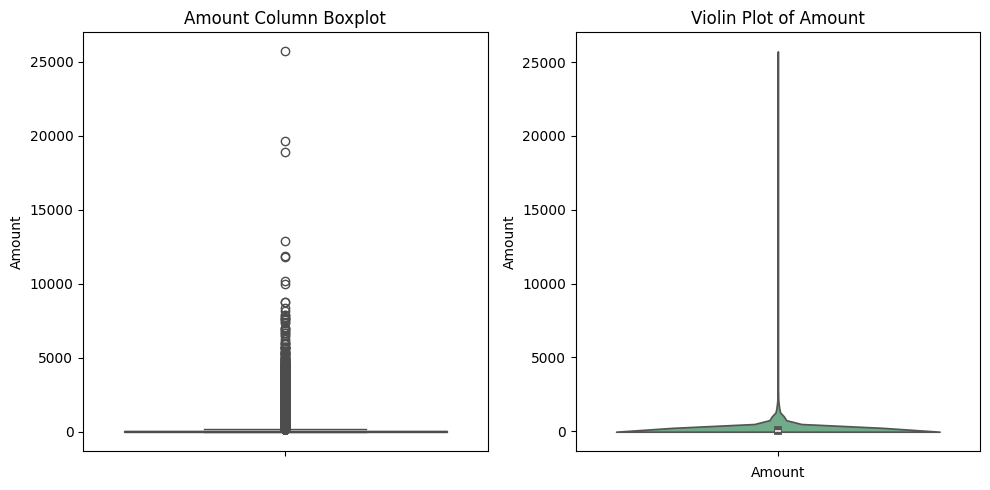

Total number of outliers: 7
Fraudulent outliers: 0
Non-fraudulent outliers: 7


In [200]:
# Set up the figure with 1 row and 2 columns
plt.figure(figsize=(10, 5))

# Plot the Boxplot on the first subplot (horizontal)
plt.subplot(1, 2, 1)  # (1 row, 2 columns, first plot)
sns.boxplot(y=fraud_df['Amount'], color='blue')  # Changed x to y for horizontal boxplot
plt.title('Amount Column Boxplot')
plt.ylabel('Amount')  # Changed xlabel to ylabel since it's horizontal
# Plot the Violin Plot on the second subplot
plt.subplot(1, 2, 2)  # (1 row, 2 columns, second plot)
sns.violinplot(y=fraud_df['Amount'], inner="box", color=colors[2])  # You can choose different colors for each plot
plt.title('Violin Plot of Amount')
plt.xlabel('Amount')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Define a threshold for considering a value as an outlier
outlier_threshold = 10000

# Identify transactions that are outliers
outliers = fraud_df[fraud_df['Amount'] > outlier_threshold]

# Check the proportion of fraud among the outliers
fraud_outliers = outliers[outliers['Class'] == 1]
non_fraud_outliers = outliers[outliers['Class'] == 0]

print(f"Total number of outliers: {len(outliers)}")
print(f"Fraudulent outliers: {len(fraud_outliers)}")
print(f"Non-fraudulent outliers: {len(non_fraud_outliers)}")

We found 7 outliers in the 'Amount' column; however, none of them are related to fraud. Despite being outliers, they still fall within an acceptable range of values. Moreover, we're dealing with only 7 affected rows in a dataset with over 200,000 entries, so we chose not to apply any processing to these outliers.

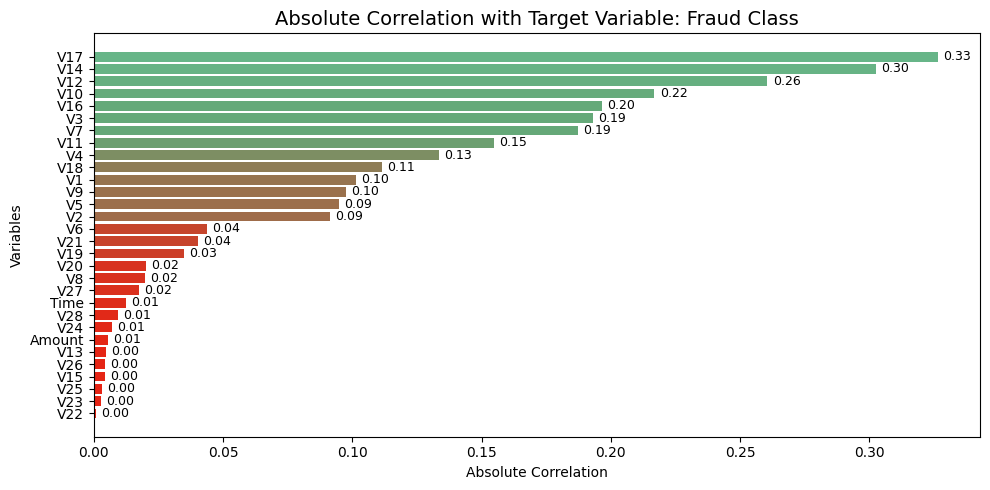

In [201]:
from matplotlib.colors import LinearSegmentedColormap

# Calculates the correlation matrix and sorts by absolute correlation with the target variable
correlation_matrix = fraud_df.corr()
correlations = correlation_matrix["Class"].abs().sort_values(ascending=False)
correlations = correlations[correlations.index != "Class"]

cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
norm = plt.Normalize(correlations.min(), correlations.max())
bar_colors = cmap(norm(correlations.values))

plt.figure(figsize=(10, 5))
bars = plt.barh(correlations.index, correlations.values, color=bar_colors)
plt.title("Absolute Correlation with Target Variable: Fraud Class", fontsize=14)
plt.xlabel("Absolute Correlation")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Variables with the highest correlation at the top

# Adding values at the end of the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.002,                  # A little ahead of the end of the bar
        bar.get_y() + bar.get_height() / 2,       # Centered vertically on the bar
        f"{bar.get_width():.2f}",                 # Formatted with 2 decimal places
        va='center', ha='left', fontsize=9
    )

plt.tight_layout()
plt.show()

Some features have very low correlation with the 'Class' variable, which indicates whether a transaction is fraudulent or not. However, in this case, we won't remove any columns based on correlation alone, as we plan to perform a Recursive Feature Elimination (RFE) combined with cross-validation at the end of the project to find the best feature selection for our model.

<Axes: >

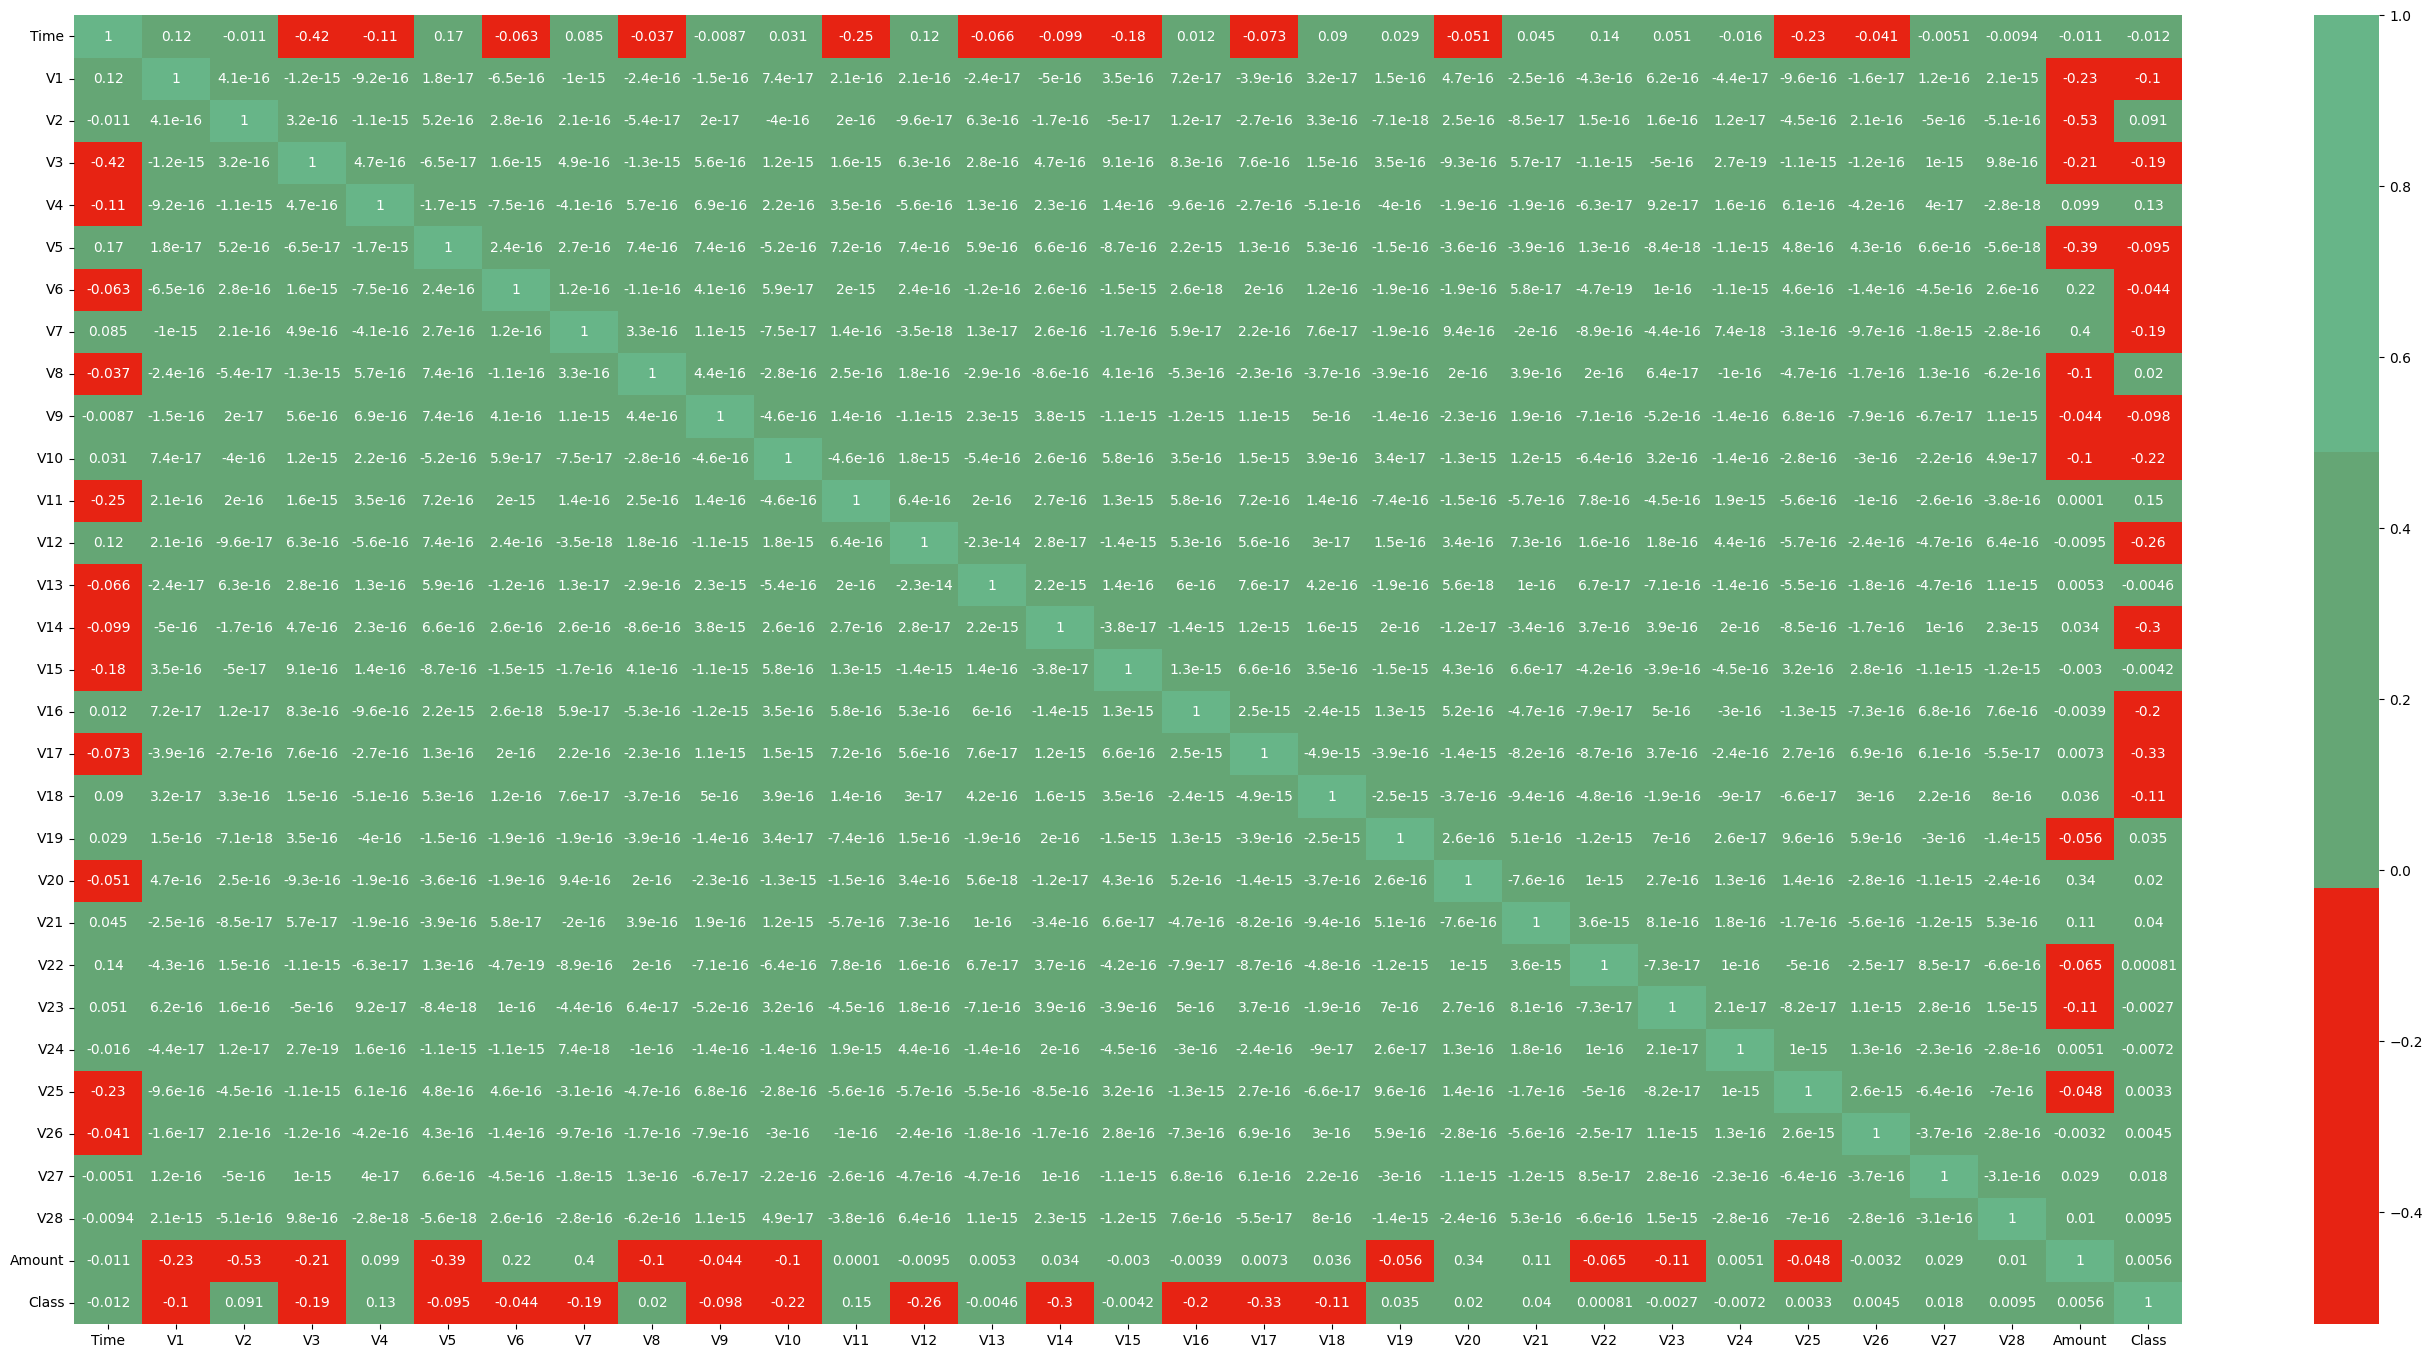

In [203]:
plt.figure(figsize = (34,17))
sns.heatmap(fraud_df.corr(),cmap = colors,annot = True)

Here we can see the correlations between the variables in our DataFrame.

In [204]:
from matplotlib.colors import LinearSegmentedColormap

def compute_vif_from_df2(df, exclude_cols=None, plot=True, colors=['#e72313', '#65a675', '#67b588']):
    import pandas as pd
    import matplotlib.pyplot as plt
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    exclude_cols = exclude_cols or []
    num_cols = [col for col in df.select_dtypes(include='number').columns if col not in exclude_cols]
    X = df[num_cols].dropna()

    vif_data = []
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X.values, i)
        vif_data.append({'feature': num_cols[i], 'VIF': vif})

    vif_df = pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False).reset_index(drop=True)

    if plot:
        cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)
        norm = plt.Normalize(vif_df['VIF'].min(), vif_df['VIF'].max())
        bar_colors = cmap(norm(vif_df['VIF'].values))

        plt.figure(figsize=(10, 5))
        bars = plt.bar(vif_df['feature'], vif_df['VIF'], color=bar_colors)
        plt.ylabel('VIF')
        plt.title('VIF by Feature (from highest to lowest)')
        plt.xticks(rotation=45)

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                     f"{height:.2f}", ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    return vif_df

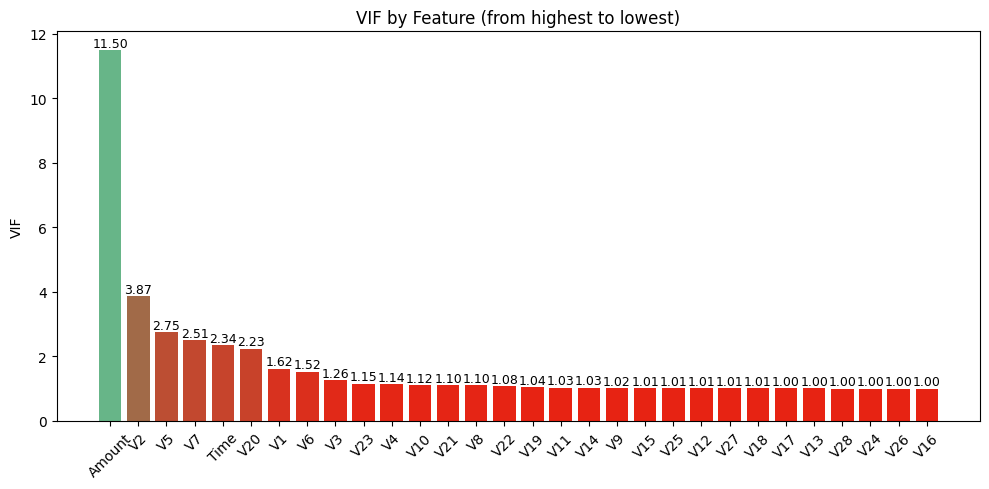

In [205]:
vif_df = compute_vif_from_df2(fraud_df, exclude_cols=['Class'])

VIF (Variance Inflation Factor) is a metric that quantifies how much a feature is linearly correlated with other features in a dataset. A high VIF indicates multicollinearity, meaning that the feature can be predicted well from other features, which may reduce the performance and interpretability of some models, especially linear ones.

In this chart, we can see the columns with the highest VIF values. As shown, only the 'Amount' column stands out, with a high VIF of 11.50 compared to the rest of the features.

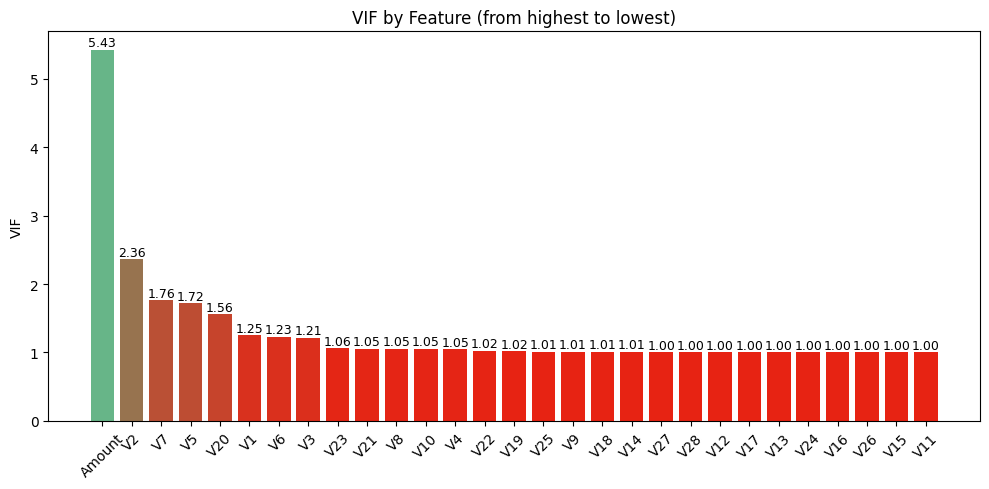

In [206]:
vif_df = compute_vif_from_df2(fraud_df, exclude_cols=['Class', 'Time'])

Now we can see the VIF values without the 'Time' column.

The 'Time' feature will be removed at the beginning of the data processing step, as it doesn't provide meaningful information for building our fraud prediction model.

After removing 'Time', the VIF of the 'Amount' column dropped to 5.43, which is considered an acceptable level.

<center>
  <div style="font-family: Arial, sans-serif; background-color: #67b588; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 2: Data Processing
  </div>
</center>

In [ ]:
fraud_df_clean = fraud_df.copy()

# Drop feature 'Time'
fraud_df_clean = fraud_df.drop(columns=['Time'])

### 2.1: Splitting Data

We will start by splitting our dataset so we can apply the appropriate preprocessing steps separately to the training, validation, and test sets, in order to avoid any kind of data leakage.

In [208]:
from sklearn.model_selection import train_test_split

X = fraud_df_clean.drop(columns=['Class'])
y = fraud_df_clean['Class']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42) 

print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (170883, 29) (170883,)
Shape of validation set: (56962, 29) (56962,)
Shape of test set: (56962, 29) (56962,)


In [209]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
74456,1.117794,0.256205,0.242660,1.093816,-0.030892,-0.456414,0.271483,-0.167214,-0.189264,-0.081020,...,-0.018058,0.093912,0.306353,-0.120715,0.118219,0.635185,-0.306978,0.029033,0.026853,47.92
96407,-1.047459,1.403839,-1.024060,-1.099003,2.132122,3.727823,-1.269340,-1.348829,-1.096401,-1.085429,...,0.574416,-1.141032,0.466258,0.091116,1.017133,-0.258486,0.285005,-0.053737,0.118632,1.50
198242,0.160969,-3.749992,-3.540734,0.424158,-0.901679,-1.154844,1.857496,-0.740155,-1.027584,0.494992,...,1.349125,0.625777,0.033529,-1.059404,0.055980,0.303100,-0.320527,-0.234093,0.093084,1052.92
27489,1.411564,-1.232946,0.801654,-1.282521,-1.943910,-0.830439,-1.210123,-0.103866,-1.520176,1.409603,...,-0.282131,-0.260823,-0.510538,0.113410,0.321600,0.106883,-0.334594,0.039047,0.037220,55.00
121114,-0.160939,0.705356,1.669306,0.941962,0.324622,-0.080444,0.619046,-0.160557,0.119227,-0.162996,...,0.044017,-0.230701,-0.331014,-0.123881,-0.170461,-0.418866,-0.544911,0.032649,-0.057032,1.00


In [210]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.394322,0.080084,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,-0.515765,-0.295555,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,2.034786,-1.060151,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.192024,-0.281684,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,0.009083,-0.164015,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50


### 2.2: Standard Scaler

We will apply StandardScaler to bring the values of the 'Amount' feature to the same scale as the other features.

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])
X_val[['Amount']] = scaler.transform(X_val[['Amount']])
X_test[['Amount']] = scaler.transform(X_test[['Amount']])

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
74456,1.117794,0.256205,0.242660,1.093816,-0.030892,-0.456414,0.271483,-0.167214,-0.189264,-0.081020,...,-0.018058,0.093912,0.306353,-0.120715,0.118219,0.635185,-0.306978,0.029033,0.026853,-0.162886
96407,-1.047459,1.403839,-1.024060,-1.099003,2.132122,3.727823,-1.269340,-1.348829,-1.096401,-1.085429,...,0.574416,-1.141032,0.466258,0.091116,1.017133,-0.258486,0.285005,-0.053737,0.118632,-0.353288
198242,0.160969,-3.749992,-3.540734,0.424158,-0.901679,-1.154844,1.857496,-0.740155,-1.027584,0.494992,...,1.349125,0.625777,0.033529,-1.059404,0.055980,0.303100,-0.320527,-0.234093,0.093084,3.959338
27489,1.411564,-1.232946,0.801654,-1.282521,-1.943910,-0.830439,-1.210123,-0.103866,-1.520176,1.409603,...,-0.282131,-0.260823,-0.510538,0.113410,0.321600,0.106883,-0.334594,0.039047,0.037220,-0.133846
121114,-0.160939,0.705356,1.669306,0.941962,0.324622,-0.080444,0.619046,-0.160557,0.119227,-0.162996,...,0.044017,-0.230701,-0.331014,-0.123881,-0.170461,-0.418866,-0.544911,0.032649,-0.057032,-0.355339


In [212]:
pd.Series(y_test).value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

In [213]:
pd.Series(y_val).value_counts()

Class
0    56863
1       99
Name: count, dtype: int64

In [214]:
pd.Series(y_train).value_counts()

Class
0    170588
1       295
Name: count, dtype: int64

### 2.3: Undersampling

We will use undersampling to create balanced training datasets for our algorithms by randomly reducing the number of samples from the majority class until it matches the number of samples in the minority class.

In [215]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (590, 29) (590,)


In [216]:
pd.Series(y_train_us).value_counts()

Class
0    295
1    295
Name: count, dtype: int64

### 2.4: Oversampling

We will use oversampling with SMOTE (Synthetic Minority Over-sampling Technique) to create balanced training datasets by generating synthetic examples of the minority class until it matches the size of the majority class. This process will be applied only to the training set to preserve the real-world class distribution during evaluation.

In [217]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (590, 29) (590,)


In [218]:
pd.Series(y_train_smote).value_counts()

Class
0    170588
1    170588
Name: count, dtype: int64

<center>
  <div style="font-family: Arial, sans-serif; background-color: #67b588; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 3: Building Machine Learning Models
  </div>
</center>

We will now evaluate several machine learning algorithms to identify the most promising candidate. This preliminary evaluation will include testing on both the training and validation sets to assess performance and identify any potential overfitting. To streamline this process, we will create a helper function, evaluate_classifier, which will generate a classification report for each algorithm, providing key metrics such as precision, recall, F1-score, and accuracy. We will pay particularly close attention to the performance metrics related to the Fraud class.

Additionally, we will use datasets with undersampling and oversampling only for training our models, to help them learn from the minority class. However, all evaluations will be performed using the original imbalanced dataset, as this better reflects real-world conditions where fraud cases are rare.

In [219]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_classifier(X_train, y_train, X_test, y_test, model, target_names=['Not Churn', 'Churn']):
    """
    Trains and evaluates a classifier, printing the classification report and AUC-ROC.
    The target names are set to 'Not Churn' and 'Churn' by default.

    Args:
        X_train: Training data (features).
        y_train: Training labels.
        X_test: Test data (features).
        y_test: Test labels.
        model: Classifier (required).
        target_names: List of target names (optional). Defaults to ['Not Churn', 'Churn'].
    """

    model.fit(X_train, y_train)

    # Evaluation on the training set
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    auc_roc_train = roc_auc_score(y_train, y_train_proba)

    print("----- Training Set -----")
    print(classification_report(y_train, y_train_pred, target_names=target_names))
    print(f"AUC-ROC (Train): {auc_roc_train}")


    # Evaluation on the test set
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    auc_roc_test = roc_auc_score(y_test, y_test_proba)

    print("\n\n----- Test Set -----")
    print(classification_report(y_test, y_test_pred, target_names=target_names))
    print(f"AUC-ROC (Test): {auc_roc_test}") 

### 3.1: Logistic Regression

In [220]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=42)

In [221]:
evaluate_classifier(X_train, y_train, X_val, y_val, model=lr_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       0.91      0.69      0.79       295

    accuracy                           1.00    170883
   macro avg       0.96      0.85      0.89    170883
weighted avg       1.00      1.00      1.00    170883

AUC-ROC (Train): 0.9841234684578525


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56863
       Churn       0.81      0.53      0.64        99

    accuracy                           1.00     56962
   macro avg       0.91      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.9651741373071587


In [222]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=lr_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.94      0.98      0.96       295
       Churn       0.98      0.94      0.96       295

    accuracy                           0.96       590
   macro avg       0.96      0.96      0.96       590
weighted avg       0.96      0.96      0.96       590

AUC-ROC (Train): 0.9921172076989372


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      0.96      0.98     56863
       Churn       0.04      0.90      0.07        99

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962

AUC-ROC (Test): 0.971410462538261


In [223]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=lr_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.95      0.98      0.96    170588
       Churn       0.98      0.94      0.96    170588

    accuracy                           0.96    341176
   macro avg       0.96      0.96      0.96    341176
weighted avg       0.96      0.96      0.96    341176

AUC-ROC (Train): 0.9936565119499619


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      0.97      0.99     56863
       Churn       0.06      0.88      0.11        99

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC-ROC (Test): 0.9734316238018118


### 3.2: Random Forest

In [224]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

In [225]:
evaluate_classifier(X_train, y_train, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       1.00      1.00      1.00       295

    accuracy                           1.00    170883
   macro avg       1.00      1.00      1.00    170883
weighted avg       1.00      1.00      1.00    170883

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56863
       Churn       0.92      0.71      0.80        99

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.9274510044254869


In [226]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00       295
       Churn       1.00      1.00      1.00       295

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      0.97      0.99     56863
       Churn       0.06      0.88      0.10        99

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC-ROC (Test): 0.9719076703407463


In [227]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       1.00      1.00      1.00    170588

    accuracy                           1.00    341176
   macro avg       1.00      1.00      1.00    341176
weighted avg       1.00      1.00      1.00    341176

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56863
       Churn       0.87      0.78      0.82        99

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.9609607497161794


### 3.3: Gradient Boosting Classifier

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state=42)

In [229]:
evaluate_classifier(X_train, y_train, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       0.89      0.62      0.73       295

    accuracy                           1.00    170883
   macro avg       0.95      0.81      0.87    170883
weighted avg       1.00      1.00      1.00    170883

AUC-ROC (Train): 0.7744610565330762


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56863
       Churn       0.85      0.54      0.66        99

    accuracy                           1.00     56962
   macro avg       0.93      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.7826610369740349


In [230]:
evaluate_classifier(X_train_us, y_train_us, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00       295
       Churn       1.00      1.00      1.00       295

    accuracy                           1.00       590
   macro avg       1.00      1.00      1.00       590
weighted avg       1.00      1.00      1.00       590

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      0.97      0.98     56863
       Churn       0.04      0.91      0.08        99

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

AUC-ROC (Test): 0.9724070097951181


In [231]:
evaluate_classifier(X_train_smote, y_train_smote, X_val, y_val, model=gbc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       0.99      0.99      0.99    170588
       Churn       0.99      0.99      0.99    170588

    accuracy                           0.99    341176
   macro avg       0.99      0.99      0.99    341176
weighted avg       0.99      0.99      0.99    341176

AUC-ROC (Train): 0.9992660466166222


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      0.99      0.99     56863
       Churn       0.12      0.86      0.21        99

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962

AUC-ROC (Test): 0.9668089366663131


### 3.4: SVC

In [232]:
from sklearn.svm import SVC
 
svc_model = SVC(kernel='linear',  random_state=42, probability=True)

In [233]:
evaluate_classifier(X_train, y_train, X_val, y_val, model=svc_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       0.86      0.80      0.83       295

    accuracy                           1.00    170883
   macro avg       0.93      0.90      0.92    170883
weighted avg       1.00      1.00      1.00    170883

AUC-ROC (Train): 0.9525044482235522


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56863
       Churn       0.83      0.70      0.76        99

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.921189277009406


### 3.5: Sequential Neural Network

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create and train the model
def create_and_train_model(X_train, y_train, X_test, y_test): 
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['recall'])

    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.2).astype(int)

    print(classification_report(y_test, y_pred_classes))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred))

In [235]:
# 1. Train with original data
print("Training with original data:")
create_and_train_model(X_train, y_train, X_val, y_val) 

# 2. Train with undersampling
print("\nTraining with undersampling:")
create_and_train_model(X_train_us, y_train_us, X_val, y_val)

# 3. Train with SMOTE
print("\nTraining with SMOTE:")
create_and_train_model(X_train_smote, y_train_smote, X_val, y_val)

Training with original data:
Epoch 1/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0634 - recall: 0.0562 - val_loss: 0.0043 - val_recall: 0.8400
Epoch 2/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0085 - recall: 0.3068 - val_loss: 0.0042 - val_recall: 0.8200
Epoch 3/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0077 - recall: 0.4647 - val_loss: 0.0037 - val_recall: 0.8400
Epoch 4/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0060 - recall: 0.5216 - val_loss: 0.0035 - val_recall: 0.8200
Epoch 5/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0060 - recall: 0.5051 - val_loss: 0.0030 - val_recall: 0.6600
Epoch 6/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0054 - recall: 0.4125 - val_loss: 0.0037 - val_recall: 0.7800
Epoch 7/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0039 - recall: 0.5644 - val_loss: 0.0029 - val_recall: 0.7000
Epoch 8/20
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0046 - recall: 0.4920 - 

### 3.6: Analyzing Best Results

- Selected by AUC-ROC Score

<table style="font-family: Arial, sans-serif; border-collapse: collapse; width: 75%;">
  <thead>
    <tr style="background-color: #000000; color: white; font-weight: bold;">
      <th style="border: 1px solid #ddd; padding: 8px;">ML Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Training Set</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Precision (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Recall (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">F1-Score (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
      <th style="border: 1px solid #ddd; padding: 8px;">ROC AUC Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
    <tr style="background-color: #65a675; color: #2D2926; font-weight: bold;">
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">6%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">88%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">11%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Random Forest Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">6%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">88%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">10%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
    </tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Gradient Boosting Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Undersampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">4%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">91%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">8%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SVC</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">70%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">76%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">92%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Sequential Neural Network</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">71%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">77%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">96%</td>
    </tr>
  </tbody>
</table>

Here we can see that the Logistic Regression algorithm trained on the standard dataset achieved the best ROC AUC Score, with 97%. However, it performed very poorly in terms of precision for the Fraud class. A precision of 6% makes the model unsuitable for practical use, as it would result in a large number of false positives.

- Selected by F1-Score and Recall of Fraud

<table style="font-family: Arial, sans-serif; border-collapse: collapse; width: 75%;">
  <thead>
    <tr style="background-color: #000000; color: white; font-weight: bold;">
      <th style="border: 1px solid #ddd; padding: 8px;">ML Algorithm</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Training Set</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Precision (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Recall (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">F1-Score (Churn)</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
      <th style="border: 1px solid #ddd; padding: 8px;">ROC AUC Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Logistic Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">81%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">53%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">64%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">97%</td>
    </tr>
    <tr>
    <tr style="background-color: #65a675; color: #2D2926; font-weight: bold;">
      <td style="border: 1px solid #ddd; padding: 8px;">Random Forest Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Oversampling</td>
      <td style="border: 1px solid #ddd; padding: 8px;">87%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">78%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">82%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">96%</td>
    </tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Gradient Boosting Classifier</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">85%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">54%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">66%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">78%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SVC</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">83%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">70%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">76%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">92%</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Sequential Neural Network</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Standard</td>
      <td style="border: 1px solid #ddd; padding: 8px;">84%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">71%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">77%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">100%</td>
      <td style="border: 1px solid #ddd; padding: 8px;">96%</td>
    </tr>
  </tbody>
</table>


Our Random Forest model trained with oversampling techniques turned out to be the best-performing algorithm among those we tested. With a recall of 78%, it is able to detect a large number of fraud cases while maintaining a precision of 87%, meaning it generates few false alerts.

<center>
  <div style="font-family: Arial, sans-serif; background-color: #67b588; color: #2D2926; padding: 12px; line-height: 1; font-size: 32px; font-weight: bold;">
    Chapter 4: Testing Models and Conclusion
  </div>
</center>

Random Forest, trained with oversampled dataset, has emerged as the most promising algorithm for our fraud detection problem. We will now  evaluate its performance on the held-out test set to confirm the consistency of the observed results.

Following this, we will refine the model using the validation set, employing a stratified k-fold cross-validation approach for feature selection to identify 
the most informative predictors. 

Finally, a randomized hyperparameter search will be conducted to further optimize the algorithm and identify the best possible configuration for our specific use case.

### 4.1: Testing Model

In [ ]:
# rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

evaluate_classifier(X_train_smote, y_train_smote, X_test, y_test, model=rf_model)

----- Training Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00    170588
       Churn       1.00      1.00      1.00    170588

    accuracy                           1.00    341176
   macro avg       1.00      1.00      1.00    341176
weighted avg       1.00      1.00      1.00    341176

AUC-ROC (Train): 1.0


----- Test Set -----
              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00     56864
       Churn       0.85      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC (Test): 0.9690410632457823


Our chosen model performed even better on the test set. With a recall of 84% for fraud cases, it indicates a high number of detected instances, and with a precision of 85%, it means that few false alerts will occur.

### 4.2: Feature Selection

We attempted Feature Selection and Random Search(4.3), but did not find any combination of features or hyperparameters that significantly improved the prediction results of our model. The corresponding code is commented below.

In [1]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold

# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# cv = StratifiedKFold(n_splits=5)

# selector = RFECV(estimator=model, step=1, cv=cv, scoring='f1_macro')
# selector.fit(X_train_smote, y_train_smote)

# print("Optimal number of features:", selector.n_features_)
# print("Selected features:", X_train_smote.columns[selector.support_])

In [ ]:
# # Creates subsets with the selected features
# X_train_smote_selected = X_train_smote.loc[:, selector.support_]
# X_val_selected = X_val.loc[:, selector.support_]
# X_test_selected = X_test.loc[:, selector.support_]

In [3]:
# print("Original shape:", X_train.shape)
# print("Shape with selected features:", X_train_smote_selected.shape)

In [4]:
# evaluate_classifier(X_train_smote_selected, y_train_smote, X_test_selected, y_test, model=rf_model)

### 4.3: Random Search

In [241]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score, make_scorer
# from sklearn.model_selection import RandomizedSearchCV

# def random_search_rf(X_train, y_train, X_val, y_val, n_iter=50, cv=3, scoring='f1', random_state=42):
#     """
#     Performs a randomized search for hyperparameters for a RandomForestClassifier,
#     optimizing for the F1-score.
#     """

#     param_dist = {
#         'n_estimators': [50, 100, 200, 300],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['sqrt', 'log2', None],
#         'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 10}, {0: 1, 1: 20}, {0: 1, 1: 50}]
#     }

#     rf = RandomForestClassifier(random_state=random_state)

#     # Using make_scorer to specify the F1-score of the positive class (fraud/churn):
#     f1_scorer = make_scorer(f1_score, pos_label=1)  # pos_label=1 for the minority class

#     random_search = RandomizedSearchCV(
#         rf,
#         param_distributions=param_dist,
#         n_iter=n_iter,
#         cv=cv,
#         scoring=f1_scorer,  # Using the f1_scorer here
#         n_jobs=-1,
#         verbose=1,
#         random_state=random_state
#     )

#     random_search.fit(X_train, y_train)

#     print("Best hyperparameters:", random_search.best_params_)
#     print("Best F1-score (class 1):", random_search.best_score_)

#     # Evaluate using the original evaluate_classifier function
#     evaluate_classifier(X_train, y_train, X_val, y_val, model=random_search.best_estimator_)

#     return random_search.best_estimator_

In [ ]:
# best_rf_model = random_search_rf(X_train_smote, y_train_smote, X_val y_val)